## Part A: Subreddit Prediction ##

In [0]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_validation = "coursework_subreddit_validation.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train2020.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_validation2020.json $subreddit_validation 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test

Copying gs://textasdata/coursework/coursework_subreddit_train2020.json...
/ [1 files][  8.0 MiB/  8.0 MiB]                                                
Operation completed over 1 objects/8.0 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_validation2020.json...
/ [1 files][  2.1 MiB/  2.1 MiB]                                                
Operation completed over 1 objects/2.1 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


In [0]:
import pandas as pd
train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns.values))
print(train_threads.head())
print(train_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/relationships/comment...
1           1.0  ...  https://www.reddit.com/r/AskReddit/comments/22...
2           1.0  ...  https://www.reddit.com/r/trees/comments/46d0iu...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/19...
4           1.0  ...  https://www.reddit.com/r/explainlikeimfive/com...

[5 rows x 5 columns]
5820


In [0]:
validation_threads = pd.read_json(path_or_buf=subreddit_validation, lines=True)
print(list(validation_threads.columns.values))
print(validation_threads.head())
print(validation_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/hearthstone/comments/...
1           1.0  ...  https://www.reddit.com/r/explainlikeimfive/com...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/tl...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/22...
4           1.0  ...  https://www.reddit.com/r/reddit.com/comments/f...

[5 rows x 5 columns]
1460


In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)

   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/starcraft/comments/mq...
1           1.0  ...  https://www.reddit.com/r/whowouldwin/comments/...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/27...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/x9...
4           1.0  ...  https://www.reddit.com/r/tipofmytongue/comment...

[5 rows x 5 columns]
1825


In [0]:
subreddit_counts = train_threads['subreddit'].value_counts()
print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
top_subbreddits_list = top_subbreddits.index.tolist()
print(top_subbreddits)

count     20.000000
mean      58.200000
std       60.248258
min       20.000000
25%       28.750000
50%       38.500000
75%       49.500000
max      276.000000
Name: subreddit, dtype: float64
askreddit               276
leagueoflegends         157
buildapc                103
explainlikeimfive        60
gaming                   51
trees                    49
techsupport              48
pcmasterrace             47
electronic_cigarette     46
relationships            42
tipofmytongue            35
summonerschool           33
jailbreak                31
hearthstone              30
whowouldwin              29
atheism                  28
personalfinance          27
reddit.com               27
movies                   25
starcraft                20
Name: subreddit, dtype: int64


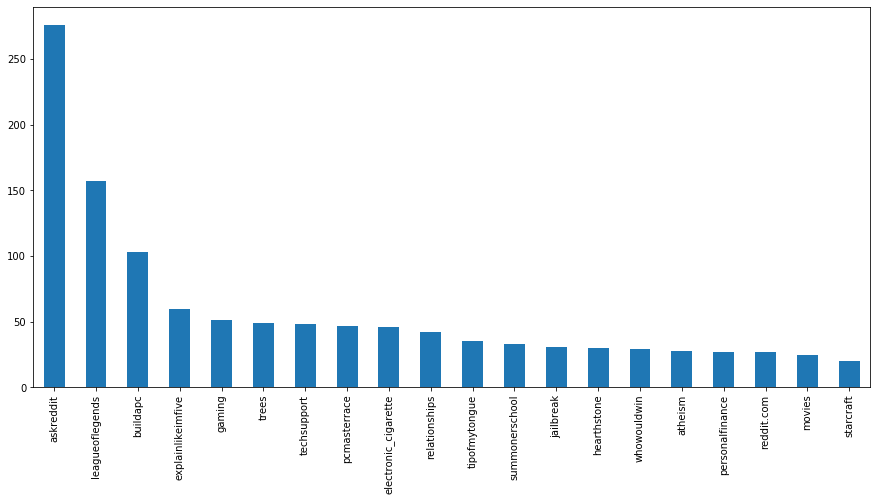

In [0]:
#plot the class distribution on tha train set
top_subbreddits.plot.bar()

In [0]:
train_labels = train_threads['subreddit']
validation_labels = validation_threads['subreddit']
test_labels = test_threads['subreddit']

In [0]:
#Code  taken from the labs of Text as Data
import spacy

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
#@Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
    #print(token.lemma)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
def normalize_lemma(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.lemma_.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))
def tokenize_normalize_lemma(string):
  return normalize_lemma(spacy_tokenize(string))

In [0]:
#function to get all the necessary information from the initial data to create new features
def group_threads_details(data):
  post_authors=[]
  posts=[]
  titles=[]
  for i in range(len(data)):
    titles.append(data.iloc[i]['title'])
    post_string=''
    author_string=''
    thread_posts=data.iloc[i]['posts']    
    for post in thread_posts:
      post_string+=" "+post.get('body', "")
      author_string+=" "+post.get('author',"")
    post_authors.append(author_string)
    posts.append(post_string)

  transformed_data={'title':titles,'posts':posts,'authors':post_authors}
  return pd.DataFrame(data=transformed_data) 

train_transformed=group_threads_details(train_threads)
test_transformed=group_threads_details(test_threads)
validation_transformed=group_threads_details(validation_threads)

We can observe that there are some posts without author. We will assume that this is not a problem as it does not affect our task. We just get minor less information. Although the name of the author theoritcally should not make such a big difference rather that the whole body of a post.

## Q1

In [0]:
#taken ready from the lab4
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  return (accuracy,precision,recall,f1)

In [0]:
#Evaluate the dummy classifier on the test data.
from sklearn.dummy import DummyClassifier
random=DummyClassifier(strategy='stratified').fit(train_threads,train_labels)
most_frequent=DummyClassifier(strategy='most_frequent').fit(train_threads,train_labels)

validation_test_labels = random.predict(test_threads)
random_stats=evaluation_summary("random",  validation_test_labels, test_labels)
validation_test_labels = most_frequent.predict(test_threads)
most_frequent_stats=evaluation_summary("most_frequent",  validation_test_labels, test_labels)

Evaluation for: random
Classifier 'random' has Acc=0.123 P=0.053 R=0.046 F1=0.047
Evaluation for: most_frequent
Classifier 'most_frequent' has Acc=0.230 P=0.050 R=0.012 F1=0.019


In [0]:
#transform to one hot encoding
#code reused from lab4
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

one_hot_transformer=FeatureUnion(
          [
            ('authors', Pipeline([
              ('selector', ItemSelector(key='authors')),
              ('one hot', CountVectorizer(tokenizer=None, binary=True)) 
              ])),
            ('posts', Pipeline([
              ('selector', ItemSelector(key='posts')),
              ('one hot', CountVectorizer(tokenizer=tokenize_normalize_lemma, binary=True)) 
              ])),
           ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one hot', CountVectorizer(tokenizer=tokenize_normalize_lemma, binary=True)) 
              ]))
        ])
train_one_hot=one_hot_transformer.fit_transform(train_transformed)
test_one_hot=one_hot_transformer.transform(test_transformed)
validation_one_hot=one_hot_transformer.transform(validation_transformed)


In [0]:
#evalute Logistic Regression on test set with one hot encoding
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=2000)
model_lr.fit(train_one_hot,train_labels)
lr_one_hot_validation_predicted_labels = model_lr.predict(test_one_hot)
lr_one_hot_stats=evaluation_summary("logistic regression ONE HOT ENCODING",  lr_one_hot_validation_predicted_labels, test_labels)

Evaluation for: logistic regression ONE HOT ENCODING
Classifier 'logistic regression ONE HOT ENCODING' has Acc=0.658 P=0.546 R=0.732 F1=0.583


In [0]:
#transform to TF_IDF
#code reused from lab4
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer=FeatureUnion(
          [
            ('authors', Pipeline([
              ('selector', ItemSelector(key='authors')),
              ('TF_IDF', TfidfVectorizer(tokenizer=None)) 
              ])),
            ('posts', Pipeline([
              ('selector', ItemSelector(key='posts')),
              ('TF_IDF', TfidfVectorizer(tokenizer=tokenize_normalize_lemma)) 
              ])),
           ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('TF_IDF', TfidfVectorizer(tokenizer=tokenize_normalize_lemma)) 
              ]))
        ])

In [0]:
#transform data to TF_IDF
train_features_tf_idf=tf_idf_vectorizer.fit_transform(train_transformed)
validation_features_tf_idf=tf_idf_vectorizer.transform(validation_transformed)
test_features_tf_idf=tf_idf_vectorizer.transform(test_transformed)
#evalute Logistic Regression on test set with TF IDF
model_lr=LogisticRegression()
model_lr.fit(train_features_tf_idf,train_labels)
validation_predicted_labels = model_lr.predict(test_features_tf_idf)
lr_tf_idf_stats=evaluation_summary("logistic regression TF_IDF",  validation_predicted_labels, test_labels)

Evaluation for: logistic regression TF_IDF
Classifier 'logistic regression TF_IDF' has Acc=0.540 P=0.349 R=0.619 F1=0.379


In [0]:
#evalute SVM on test set with one hot encoding
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(train_one_hot,train_labels)
validation_predicted_labels = svm.predict(test_one_hot)
svm_stats=evaluation_summary("SVM with ONE HOT ENCODING",  validation_predicted_labels, test_labels)

Evaluation for: SVM with ONE HOT ENCODING
Classifier 'SVM with ONE HOT ENCODING' has Acc=0.455 P=0.204 R=0.260 F1=0.191


In [0]:
#As Intersting classifier we chose neural network with tf_idf vector representation
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier()
nn.fit(train_features_tf_idf,train_labels)
nn_validation_predicted_labels = nn.predict(test_features_tf_idf)
nn_stats=evaluation_summary("Neural network TF_IDF",  nn_validation_predicted_labels, test_labels)

Evaluation for: Neural network TF_IDF
Classifier 'Neural network TF_IDF' has Acc=0.699 P=0.560 R=0.712 F1=0.593


In [0]:
stats={'Neural network TF_IDF':nn_stats,"SVM one hot":svm_stats,'LR one hot':lr_one_hot_stats,"LR TD_IDF":lr_tf_idf_stats,'random':random_stats,"most frequent":most_frequent_stats}
print("TEST SET RESULTS")
pd.DataFrame(stats,index=["accuracy","precision","recall","f1"]).round(3)

TEST SET RESULTS


Neural network TF_IDF  SVM one hot  ...  random  most frequent
accuracy                   0.699        0.455  ...   0.123          0.230
precision                  0.560        0.204  ...   0.053          0.050
recall                     0.712        0.260  ...   0.046          0.012
f1                         0.593        0.191  ...   0.047          0.019

[4 rows x 6 columns]

We can see that the best is the LR with one hot encoding. All of our classifies are doing a lot better than the dummy - baselines, which means they do work. 

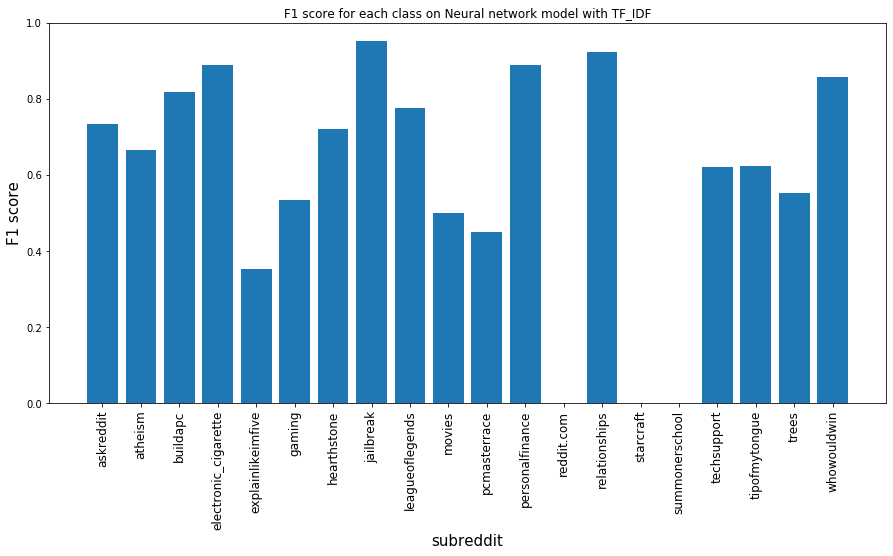

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

f1 = fbeta_score(nn_validation_predicted_labels, test_labels, 1, average=None) #1 means f_1 measure
#as per https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html 
#By default, all labels in y_true and y_pred are used in sorted order.
classes=np.unique(test_labels)#unique also sorts them.
plt.bar(classes,f1)
plt.xlabel("subreddit",fontsize=15)
plt.ylabel("F1 score",fontsize=15)
plt.title("F1 score for each class on Neural network model with TF_IDF")
plt.xticks(rotation=90,fontsize=12)
plt.show()

Text(0.5, 1.0, 'Confusion matrix for the best classifier on F1 score (Neural network)')

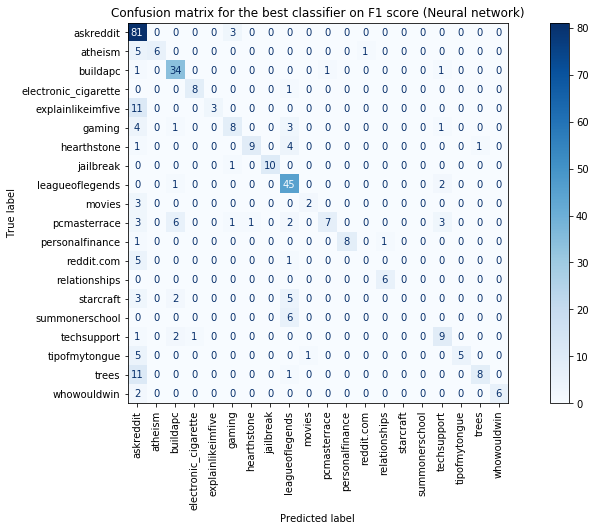

In [0]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(nn, test_features_tf_idf, test_labels,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion matrix for the best classifier on F1 score (Neural network)")

## Q2

In [0]:
#transform to TF_IDF
#code reused from lab4
import warnings
warnings.simplefilter('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=[100,5000,20000,50000]#initial search
max_features=np.arange(10,24,2)*1000 #more specific search near 5k
best_max_features=12000#Probably as we only have 20 classes, more words are not useful and only 
#these words could solidly represent the essence of a thread
#best_val=.671ac with c=2000
regular_c=np.logspace(-3, 5,num=8)
regular_c=np.array([20,45,60,80])*100
lr_solvers=["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
solver='lbfgs'#'liblinear'
c=2000
max_feat=best_max_features
#for solver in lr_solvers:
#for max_feat in max_features:
#for c in regular_c:

tf_idf_vectorizer=FeatureUnion(
        [
          ('authors', Pipeline([
            ('selector', ItemSelector(key='authors')),
            ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=tokenize_normalize,max_features=max_feat)) 
            ])),
          ('posts', Pipeline([
            ('selector', ItemSelector(key='posts')),
            ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=tokenize_normalize,max_features=max_feat)) 
            ])),
        ('title', Pipeline([
            ('selector', ItemSelector(key='title')),
            ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=tokenize_normalize,max_features=max_feat)) 
            ]))
      ])

print("max features = ",max_feat," C = ",c," solver = ",solver)
train_features_tf_idf=tf_idf_vectorizer.fit_transform(train_transformed)
validation_features_tf_idf=tf_idf_vectorizer.transform(validation_transformed)
test_features_tf_idf=tf_idf_vectorizer.transform(test_transformed)
model_lr=LogisticRegression(C=c,solver=solver)
model_lr.fit(train_features_tf_idf,train_labels)
validation_predicted_labels = model_lr.predict(validation_features_tf_idf)
lr_tf_idf_stats=evaluation_summary("logistic regression TF_IDF",  validation_predicted_labels, validation_labels)

max features =  12000  C =  2000  solver =  lbfgs
Evaluation for: logistic regression TF_IDF
Classifier 'logistic regression TF_IDF' has Acc=0.671 P=0.561 R=0.787 F1=0.605


In [0]:
#results on test features
model_lr=LogisticRegression(C=c,solver=solver)
model_lr.fit(train_features_tf_idf,train_labels)
validation_predicted_labels = model_lr.predict(test_features_tf_idf)
lr_tf_idf_stats=evaluation_summary("logistic regression TF_IDF",  validation_predicted_labels, test_labels)

Evaluation for: logistic regression TF_IDF
Classifier 'logistic regression TF_IDF' has Acc=0.668 P=0.538 R=0.694 F1=0.572


## Parameter tuning
I checked sequentially each parameter to find the optimal for each of the three parameters we search for.
Concerning max_features of vectorizer the best value was near 12k features. Probably as we only have 20 classes to classify these words could stronly represent the essence of each thread. Thus putting extra words only distorts the true meaning of each thread. Important to say that these words are chosed to be the  *MAX_FEATURES* top best in concerning term frequency. [(url)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) Furthemore, this parameter could be used as a way to remove and improve our tokens, as it works in a way similar to removing stopwords or words with small frequency, which do not provide much information.
<br/>
The regularization parameter of Logistic Regression C, is the inverse of the actual λ parameter used for regularization. Our optimal value was C=2000. By searching the parameter space we found that this was the best through tuning via the validation set. This parameter controls how much the model's parameter - weights will be penalalized according to their absolute magnitude. By choosing this certain small value (λ=1/C), although we do penalize the complexity of our model, at the same time we leave some freedom and do not force it to be very simple (big λ).
<br/> The third 'free' parameter we tuned was the solver for the logistic regression optimization problem. The optimal found was liblinear but in general all of them were really close. Nonetheless, as the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) says,liblinear is limited to one-versus-rest schemes, in multiclass problems and one of their others should be used. That is why we decided to use lbfgs as our solver.

The parameters that really helped were the number of max_features and the regularization parameter.More specifically the regularization protects our model from overfitting in order to generalize well in unseen data. Someone could infer something similar for the max_features parameter, although it is mainly used to reduce the dataset size. The solver algorithm for the optimization poblem did not really made such a huge difference. 

In [0]:
#Error analysis
model_lr=LogisticRegression(C=c,solver=solver)
model_lr.fit(train_features_tf_idf,train_labels)
validation_predicted_labels = model_lr.predict(test_features_tf_idf)
print("PREDICTED \t\t\t CORRECT")
for i in range(len(validation_predicted_labels)):
  if(test_labels[i]=='reddit.com'):
    print(validation_predicted_labels[i],"\t\t\t",test_labels[i])

PREDICTED 			 CORRECT
trees 			 reddit.com
askreddit 			 reddit.com
askreddit 			 reddit.com
askreddit 			 reddit.com
pcmasterrace 			 reddit.com
askreddit 			 reddit.com


In [0]:
print("percentage of each class in the whole dataset\n")
print(train_labels.value_counts()/train_labels.size)

percentage of each class in the whole dataset

askreddit               0.237113
leagueoflegends         0.134880
buildapc                0.088488
explainlikeimfive       0.051546
gaming                  0.043814
trees                   0.042096
techsupport             0.041237
pcmasterrace            0.040378
electronic_cigarette    0.039519
relationships           0.036082
tipofmytongue           0.030069
summonerschool          0.028351
jailbreak               0.026632
hearthstone             0.025773
whowouldwin             0.024914
atheism                 0.024055
personalfinance         0.023196
reddit.com              0.023196
movies                  0.021478
starcraft               0.017182
Name: subreddit, dtype: float64


Text(0.5, 1.0, 'Confusion matrix for the LR with optimal parameters and TF_IDF')

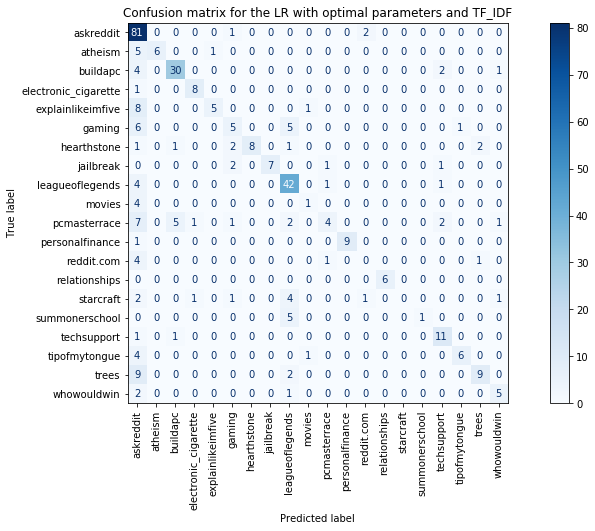

In [0]:
disp = plot_confusion_matrix(model_lr, test_features_tf_idf, test_labels,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion matrix for the LR with optimal parameters and TF_IDF")

### Error analysis
As we can see from the predictions on the validation set, most predictions are of type *askreddit*. About 24% of our training data our of class *askreddit*, so since we have such a big class inbalance (almost double percantage of *askreddit* than the second most frequent class *leagueoflegends*), it is logical that this inbalance leaning towards askreddit class will move on to the results - predictions also.
Furthermore, we have seen that all cases that the label was reddit.com the prediction was askreddit. Also, not even a single prediction reddit.com was made. This make us believe that maybe during tokenization and word preprocessing, the two words lemmatized to one word. The high percentage class of askreddit, overcame and make the minor class reddit.com to dissapear. As the model learned 10 times more about the askreddit class its weights were more optimized to respond stronger to that one. Leagueoflegends the second most frequent class in the training data, has a very good percentage of correct predictions. The main misprediction that usually happens is with the class summonerschool. This class upon searching it was found to be "a League of Legends subreddit dedicated to helping others learn/improve." as per [this](https://www.reddit.com/r/summonerschool/). We can thus deduce that they are closely related and a certain misprediction between these classes is logical to appear as it does.

#Q3

In [0]:
#use the gensim package and glove model for embedding representaton
local_file = "glove.6B.200d_gensim.txt.gz"
!gsutil cp  gs://textasdata/glove.6B.200d_gensim.txt.gz $local_file 
!pip install --upgrade gensim
from gensim.models.keyedvectors import * #\KeyedVectors 
glove_model = KeyedVectors.load_word2vec_format("glove.6B.200d_gensim.txt.gz")

Copying gs://textasdata/glove.6B.200d_gensim.txt.gz...
| [1 files][252.1 MiB/252.1 MiB]                                                
Operation completed over 1 objects/252.1 MiB.                                    
Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.1)


In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
#code was taken from lab5 of TaD
class MaximumEmbeddingVectorizer(BaseEstimator, TransformerMixin):
  
    def __init__(self, embedding_model):
        self.embedding = embedding_model
        self.dimension = embedding_model.vector_size

    def fit(self, X, y):
      # Nothing is required here. No collection properties are needed.
      return self
      
    def transform(self, X):
      # Input: X: an iterable of documents that have been tokenized.
      # Example of input with two documents: 
      # [["the", "cat", "ran"], ["the", "cat", "jumped"]]
      # Output: a numpy array of vectors, one for each document.  Each vector
      # is the mean of the vectors of each word in the document. 
      # Hint: It may require a nested loop / for comprehension.
      # Be sure to skip OOV terms. Return 0 if no words are in the vocabulary.
      model_=self.embedding
      for x_i in X:
        X_tr=[]
        filtered_words = [word for word in x_i if word in model_]
        if(len(filtered_words)>0):
          vectors =[model_[word] for word in filtered_words] 
          max_emb = np.max(vectors, axis=0)          
          X_tr.append(max_emb)
        else:
          X_tr.append(np.zeros(self.dimension))
      return np.array(X_tr)  

In [0]:
glove_vectorizer = MaximumEmbeddingVectorizer(glove_model)
#vectorize a post as a single vector
def create_w2v(data):
  w2v_list=[]
  if 'posts' in data.columns:
    data_chosen=data['posts']
  else:
    data_chosen=data['body']
  for post in data_chosen:
    x_tokenized=tokenize_normalize(post)
    w2v_list.append(glove_vectorizer.transform([x_tokenized])[0])
  return w2v_list

In [0]:
#Here we create new features to add to the model
import numpy as np
import pandas as pd
max_feat=12000
C =  2000  
solver =  'lbfgs'
#here we get the 50 most representative words for each thread, using the 50 most frequent terms found in all its posts.

def calc_50_best_words_per_thread(data):
  posts=data['posts']
  posts_50best=[]
  for i in range(len(posts)):
    tokens=posts[i].split(" ")
    freq={}
    for tok in tokens:
      if tok not in freq:
        freq[tok]=1
      else:
        freq[tok]+=1 
    freq={k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}

    count=0
    res=""
    for i in freq.keys():
      count+=1
      res+=" "+i
      if count==10:
        res=""#we dont want the top most frequent as they are mainly stopwords like I,he,she etc.
      if count==60:  
        break
    posts_50best.append(res)
  data['50_best_words']=posts_50best    
  return data

def calc_posts_count_per_thread(data):
  posts_number=[]
  for i in range(len(data)):
    count=0
    thread_posts=data.iloc[i]['posts']    
    for post in thread_posts:
      count+=1
    posts_number.append(count)
  return np.array(posts_number)

train_extended=calc_50_best_words_per_thread(train_transformed)
train_extended['posts_count']=calc_posts_count_per_thread(train_threads)
train_extended['w2v']=create_w2v(train_transformed)
train_extended['labels']=train_labels

test_extended=calc_50_best_words_per_thread(test_transformed)
test_extended['posts_count']=calc_posts_count_per_thread(test_threads)
test_extended['w2v']=create_w2v(test_transformed)

validation_extended=calc_50_best_words_per_thread(validation_transformed)
validation_extended['posts_count']=calc_posts_count_per_thread(validation_threads)
validation_extended['w2v']=create_w2v(validation_transformed)

feature_expansion=FeatureUnion(
            [
              ('authors', Pipeline([
                ('selector', ItemSelector(key='authors')),
                ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=None,max_features=max_feat)) 
                ])),
              ('posts', Pipeline([
                ('selector', ItemSelector(key='posts')),
                ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=tokenize_normalize,max_features=max_feat)) 
                ])),
            ('title', Pipeline([
                ('selector', ItemSelector(key='title')),
                ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=None,max_features=max_feat)) 
                ])),           
            ('50_best_words', Pipeline([
             ('selector', ItemSelector(key='50_best_words')),
                ('TF_IDF', TfidfVectorizer(sublinear_tf=True,tokenizer=None)) 
                ])), 
          ])


In [0]:
from scipy.sparse import  hstack
#transformed the dataset and compine and tokenize all 4 corpus like features
#here the one feature is added through feature union - 50 best words.
train_extended_1feat=feature_expansion.fit_transform(train_extended)
validation_extended_1feat=feature_expansion.transform(validation_extended)
test_extended_1feat=feature_expansion.transform(test_transformed)
print("train with one feature",train_extended_1feat.shape)

#add the numerical feature 
train_extended_2feat=hstack([train_extended_1feat ,train_extended.posts_count.values.reshape(1,len(train_extended)).T]) 
validation_extended_2feat=hstack([validation_extended_1feat ,validation_extended.posts_count.values.reshape(1,len(validation_extended)).T])
test_extended_2feat=hstack([test_extended_1feat ,test_extended.posts_count.values.reshape(1,len(test_extended)).T]) 
print("train with both features",train_extended_2feat.shape)


train with one feature (1164, 30965)
train with both features (1164, 30966)


In [0]:
#Result with only one feature - 50 best words
model_lr=LogisticRegression(C=2000,solver=solver,max_iter=500)
model_lr.fit(train_extended_1feat,train_labels)
validation_predicted_labels = model_lr.predict(test_extended_1feat)
lr_tf_idf_stats=evaluation_summary("logistic regression with 50 best words feature",  validation_predicted_labels, test_labels)


Evaluation for: logistic regression with 50 best words feature
Classifier 'logistic regression with 50 best words feature' has Acc=0.707 P=0.596 R=0.738 F1=0.623


In [0]:
#Result with both features - 50 best words and post count
model_lr=LogisticRegression(C=2000,solver=solver,max_iter=500)
model_lr.fit(train_extended_2feat,train_labels)
validation_predicted_labels = model_lr.predict(test_extended_2feat)
lr_tf_idf_stats=evaluation_summary("logistic regression with both features - 50 best words and post count ",  validation_predicted_labels, test_labels)


Evaluation for: logistic regression with both features - 50 best words and post count 
Classifier 'logistic regression with both features - 50 best words and post count ' has Acc=0.715 P=0.603 R=0.747 F1=0.628


#Q4

### Part B: Discourse prediction ##

In [0]:
#taken from the labs 
import spacy

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
#@Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
    #print(token.lemma)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
def normalize_lemma(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.lemma_.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))
def tokenize_normalize_lemma(string):
  return normalize_lemma(spacy_tokenize(string))

In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
\ [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
/ [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

#function to get all the necessary information from the initial data to create new features

def load_posts(file):
  # A temporary variable to store the list of post content.
  posts_tmp = list()

  with open(file) as jsonfile:
    for i, line in enumerate(jsonfile):
      thread = json.loads(line)
      flag_is_first_post=True
      for post in thread['posts']:
        if(flag_is_first_post):#get the initial author of this thread and
          initial_author=post.get('author', "")
          flag_is_first_post=not flag_is_first_post
          prev_post=post.get('body', "")#for the first post the previous post will be itself
          current_pre_post=post.get('body', "")
        else:
          current_pre_post=prev_post          
          prev_post=post.get('body', "") 
        is_initial_author=post.get('author', "")==initial_author 
        posts_tmp.append((is_initial_author,current_pre_post,thread['is_self_post'],thread['subreddit'], thread['title'], thread['url'],
                        post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
                        post.get('post_depth', 0), post.get('majority_type', ""), # discourse type label 
                        post.get('in_reply_to', "") ))

# Create the posts data frame.  
  labels = ['is_initial_author','previous_post','is_self_post','subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 
          'post_depth', 'discourse_type', 'in_reply_to']
  return pd.DataFrame(posts_tmp, columns=labels)

In [0]:
original_train_posts = load_posts(discourse_train)
#As some post does not contain the value, we have to put a value else it will be nan
original_train_posts['is_self_post']=original_train_posts['is_self_post'].fillna(0)
# Filter out empty labels
original_train_posts = original_train_posts[original_train_posts['discourse_type'] != ""]
print(original_train_posts.head())
print("Num posts: ", original_train_posts.size)

   is_initial_author  ... in_reply_to
0               True  ...            
1              False  ...   t3_2v0anq
2              False  ...   t3_2v0anq
3              False  ...   t3_2v0anq
4              False  ...   t3_2v0anq

[5 rows x 13 columns]
Num posts:  1030471


#### Development / Validation data

For part B it is up to you to split the "original" training data into a new train/validation (development) dataset appropriately. See Lab 4 for an example. 

In [0]:
train_split = int(len(original_train_posts) * 0.8)
validation_posts = original_train_posts.iloc[train_split:,:]
train_posts = original_train_posts.iloc[:train_split,:]

### Test data

In [0]:
test_posts = load_posts(discourse_test)
# Filter out empty labels
test_posts = test_posts[test_posts['discourse_type'] != ""]
#As some post does not contain the value, we have to put a value else it will be nan
test_posts['is_self_post']=test_posts['is_self_post'].fillna(0)


In [0]:
print('length of train posts \t\t',len(train_posts))
print('length of validation posts \t',len(test_posts))
print('length of validation posts \t',len(validation_posts))

length of train posts 		 63413
length of validation posts 	 19812
length of validation posts 	 15854


### Labels

The label for the post we will be predicting is in the discourse_type column.

In [0]:
train_labels = train_posts['discourse_type']
validation_labels = validation_posts['discourse_type']
test_labels = test_posts['discourse_type']

Examine the distribution over labels on the training data.

In [0]:
#some statistics about the train set.
discourse_counts = train_posts['discourse_type'].value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(20)
print("class percentage for the train set")
print(top_discourse/sum(top_discourse))


count       10.000000
mean      6341.300000
std       7745.962175
min       1015.000000
25%       1327.000000
50%       2562.000000
75%       9571.000000
max      25166.000000
Name: discourse_type, dtype: float64
class percentage for the train set
answer              0.396859
elaboration         0.186192
question            0.172362
appreciation        0.086638
agreement           0.048649
disagreement        0.032154
humor               0.021967
other               0.020579
announcement        0.018592
negativereaction    0.016006
Name: discourse_type, dtype: float64


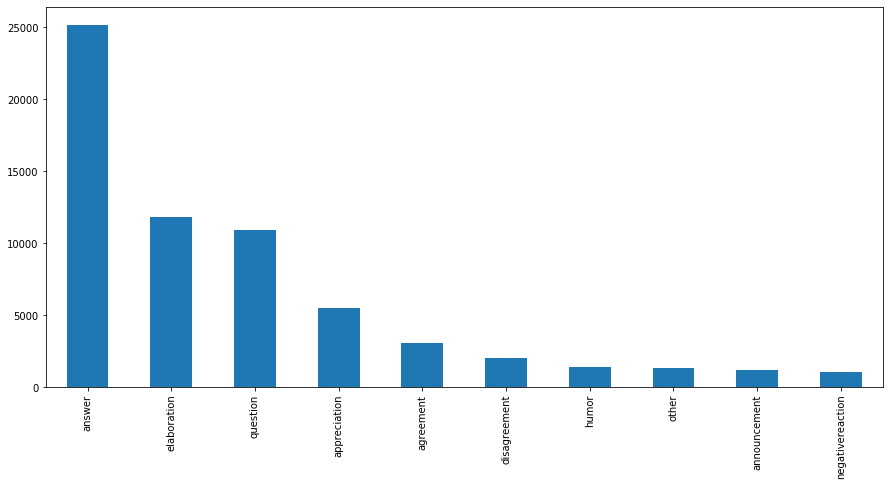

In [0]:
#plot the distribution of classes in the train set
top_discourse.plot.bar()

In [0]:
#create the initial features needed for  Q4 and the baseline of Q5
def group_threads_details(data):
  post_authors=[]
  posts=[]
  titles=[]
  for i in range(len(data)):
    titles.append(data.iloc[i]['title'])
    post_authors.append(data.iloc[i]['author'])
    posts.append(data.iloc[i]['body'])

  transformed_data={'title':titles,'body':posts,'author':post_authors}
  return pd.DataFrame(data=transformed_data) 

train_transformed_posts=group_threads_details(train_posts)
test_transformed_posts=group_threads_details(test_posts)
validation_transformed_posts=group_threads_details(validation_posts)

In [0]:
#combine the initial features needed for  Q4 and the baseline of Q5

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]
        
tfidf=FeatureUnion(
          [
            ('authors', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('TFIDF', TfidfVectorizer(tokenizer=tokenize_normalize, binary=False,sublinear_tf=True)) 
              ])),
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TFIDF', TfidfVectorizer(tokenizer=tokenize_normalize, binary=False,sublinear_tf=True)) 
              ])),
           ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('TFIDF', TfidfVectorizer(tokenizer=tokenize_normalize, binary=False,sublinear_tf=True)) 
              ]))
        ])
train=tfidf.fit_transform(train_transformed_posts)
test=tfidf.transform(test_transformed_posts)
validation=tfidf.transform(validation_transformed_posts)

In [0]:
#baseline implementation for Logistic Regression and evaluation on test data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga',C=10)
lr_model = lr.fit(train, train_labels)
preds_lr=lr_model.predict(test)
evaluation_summary("TF IDF LR",preds_lr,test_labels);

Evaluation for: TF IDF LR
Classifier 'TF IDF LR' has Acc=0.473 P=0.247 R=0.351 F1=0.265


In [0]:
#Using the class weight parameter to take into account class imbalance on test data
lr_balanced = LogisticRegression(solver='saga',C=10,class_weight='balanced')
lr_model_balanced = lr_balanced.fit(train, train_labels)
preds_lr_balanced=lr_model_balanced.predict(test)
evaluation_summary("TF IDF LR balanced",preds_lr_balanced,test_labels);

Evaluation for: TF IDF LR balanced
Classifier 'TF IDF LR balanced' has Acc=0.455 P=0.293 R=0.300 F1=0.292


In [0]:
from sklearn.metrics import classification_report
target_names=lr_model.classes_
print(classification_report(test_labels, preds_lr, target_names=target_names))

                  precision    recall  f1-score   support

       agreement       0.41      0.20      0.27       951
    announcement       0.25      0.07      0.11       365
          answer       0.52      0.70      0.59      7940
    appreciation       0.69      0.58      0.63      1720
    disagreement       0.17      0.03      0.06       641
     elaboration       0.29      0.25      0.27      3630
           humor       0.24      0.03      0.05       457
negativereaction       0.27      0.06      0.09       307
           other       0.22      0.08      0.11       376
        question       0.45      0.48      0.46      3425

        accuracy                           0.47     19812
       macro avg       0.35      0.25      0.26     19812
    weighted avg       0.44      0.47      0.44     19812



In [0]:
#evaluation for the dummy classifier.
from sklearn.dummy import DummyClassifier
random=DummyClassifier(strategy='stratified').fit(train,train_labels)
preds_stratified = random.predict(test)
random_stats=evaluation_summary("stratified",  preds_stratified, test_labels);

Evaluation for: stratified
Classifier 'stratified' has Acc=0.236 P=0.097 R=0.097 F1=0.097


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression on test data')

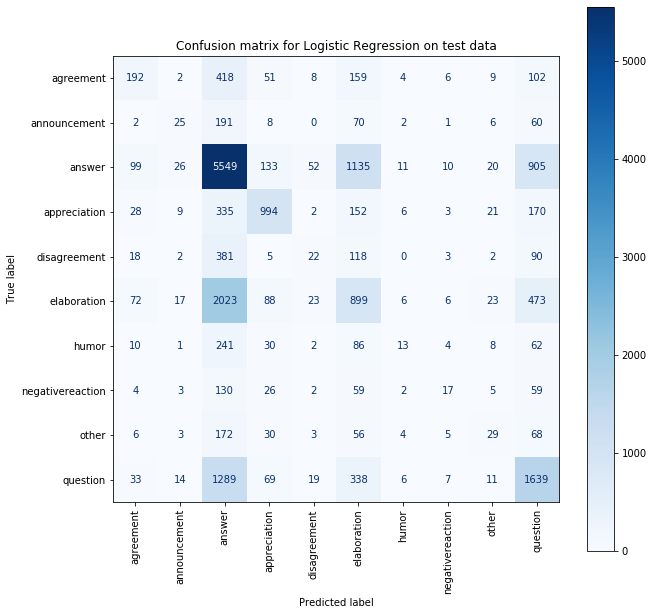

In [0]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
disp = plot_confusion_matrix(lr_model, test, test_labels,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,values_format="d")
plt.xticks(rotation=90)
plt.title("Confusion matrix for Logistic Regression on test data")

Evaluation for: TF IDF LR
Classifier 'TF IDF LR' has Acc=0.471 P=0.252 R=0.352 F1=0.271


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression on validation data')

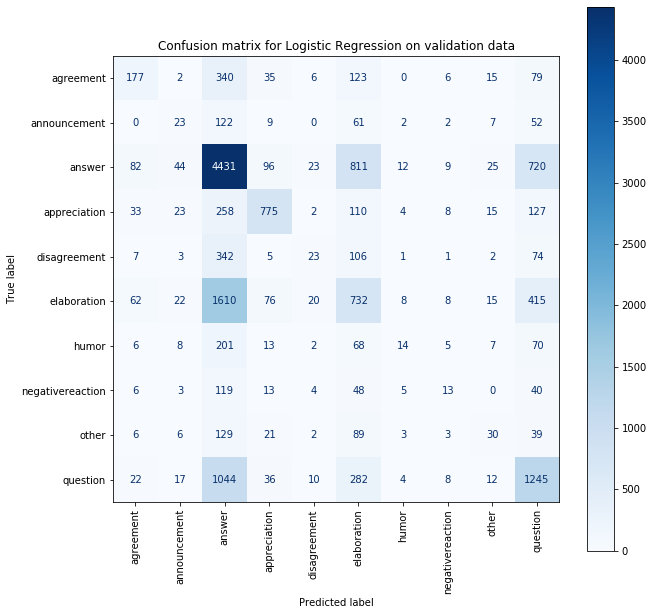

In [0]:
preds_lr=lr_model.predict(validation)
evaluation_summary("TF IDF LR",preds_lr,validation_labels);
disp = plot_confusion_matrix(lr_model, validation, validation_labels,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,values_format="d")
plt.xticks(rotation=90)
plt.title("Confusion matrix for Logistic Regression on validation data")

In [0]:
#Use SelectKBest to find the 20 best features of the whole dataset.
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
x_20_best=SelectKBest(chi2, k=20).fit(train,train_labels)
for feat in x_20_best.get_support(True):
  print("Feature id=%d has \t variance = %.5f , score = %d"%(feat,np.var(train[:,feat].toarray()),round(x_20_best.scores_[feat])))

Feature id=1484 has 	 variance = 0.00072 , score = 982
Feature id=7993 has 	 variance = 0.00028 , score = 630
Feature id=15191 has 	 variance = 0.00019 , score = 320
Feature id=18514 has 	 variance = 0.00013 , score = 290
Feature id=18639 has 	 variance = 0.00013 , score = 291
Feature id=28470 has 	 variance = 0.00064 , score = 1086
Feature id=28471 has 	 variance = 0.00043 , score = 669
Feature id=31166 has 	 variance = 0.00124 , score = 623
Feature id=40741 has 	 variance = 0.00648 , score = 348
Feature id=81603 has 	 variance = 0.00243 , score = 2443
Feature id=81609 has 	 variance = 0.00476 , score = 4998
Feature id=86938 has 	 variance = 0.00220 , score = 413
Feature id=88207 has 	 variance = 0.00120 , score = 414
Feature id=90305 has 	 variance = 0.00013 , score = 777
Feature id=93384 has 	 variance = 0.00064 , score = 437
Feature id=93619 has 	 variance = 0.00016 , score = 714
Feature id=95258 has 	 variance = 0.00016 , score = 497
Feature id=96532 has 	 variance = 0.00020 , sco

In [0]:
#Find the 10 best feature for each class using the LR coefficient for each class and their weights which represent the features importance.
sorted_dict={}
sorted_weights={}
for class_label in range(len(lr_model.coef_)):  
  sorted_={}
  for i in range(len(lr_model.coef_[class_label])):
    sorted_[i]=lr_model.coef_[class_label][i]
  sorted_={k: v for k, v in sorted(sorted_.items(), key=lambda item: item[1],reverse=True)}
  num=0
  li=[]
  weights_li=[]
  for i in sorted_:
    if num==10: break #10 most important features for the specific class
    num+=1  
    li.append(i)
    weights_li.append(round(sorted_[i],2))
  sorted_dict[class_label]=li
  sorted_weights[class_label]=weights_li

In [0]:
#10 best features for each class.
index=0
for k in sorted_dict.values():
  print("The best 10 features ids for class '%s' are : %s"%(lr_model.classes_[index],k))
  print("The weights of these features are           : %s"%(sorted_weights[index]))
  print()
  index+=1

The best 10 features ids for class 'agreement' are : [28470, 28471, 88207, 83385, 45292, 88263, 38086, 38710, 72887, 53756]
The weights of these features are           : [17.42, 14.01, 10.29, 7.95, 7.9, 6.97, 6.88, 6.76, 6.66, 6.53]

The best 10 features ids for class 'announcement' are : [43658, 75523, 8746, 50612, 86363, 82389, 29771, 46638, 16425, 45505]
The weights of these features are           : [5.73, 5.7, 5.44, 5.25, 5.16, 4.24, 4.22, 4.15, 3.92, 3.9]

The best 10 features ids for class 'answer' are : [18408, 98794, 8208, 88267, 40970, 76553, 5952, 4090, 53180, 50443]
The weights of these features are           : [5.14, 5.01, 4.9, 4.85, 4.59, 4.53, 4.41, 4.28, 4.24, 4.12]

The best 10 features ids for class 'appreciation' are : [81609, 81603, 31166, 49323, 82048, 50050, 63587, 49675, 45332, 38562]
The weights of these features are           : [21.6, 17.03, 7.74, 7.4, 7.18, 7.18, 6.97, 6.57, 6.49, 6.46]

The best 10 features ids for class 'disagreement' are : [41793, 64066, 459

#Q5

In [0]:
#function to get all the necessary information from the data to create new features
def group_threads_details_extended(data):
  post_authors=[]
  posts=[]
  titles=[]
  subreddit=[]
  previous_posts=[]
  is_initial_author=[]
  is_self_post=[]
  post_depth=[]
  for i in range(len(data)):
    titles.append(data.iloc[i]['title'])
    post_authors.append(data.iloc[i]['author'])
    posts.append(data.iloc[i]['body'])
    subreddit.append(data.iloc[i]['subreddit'])#Thread metadata
    previous_posts.append(data.iloc[i]['previous_post'])#Thread content
    is_initial_author.append(data.iloc[i]['is_initial_author'])#Author
    is_self_post.append(data.iloc[i]['is_self_post'])#Thread metadata
    post_depth.append(data.iloc[i]['post_depth'])#Discussion (thread) structure

  transformed_data={'title':titles,'body':posts,'author':post_authors,'subreddit':subreddit,
                    "previous_post":previous_posts,'is_initial_author':is_initial_author,'is_self_post':is_self_post,
                    'post_depth':post_depth}
  return pd.DataFrame(data=transformed_data) 

train_extended_transformed_posts=group_threads_details_extended(train_posts)
test_extended_transformed_posts=group_threads_details_extended(test_posts)
validation_extended_transformed_posts=group_threads_details_extended(validation_posts)

In [0]:
#taken from the labs 
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
#@Tokenization while emoticons are not removed
#taken by https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual

def nltk_emotion_free_tokenize(string):
  tokens = list()
  doc = tknzr.tokenize(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize with emoticons
def normalize_emotion_free(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.lower().strip()
    normalized_tokens.append(normalized)
  return normalized_tokens


#@Tokenize and normalize with emoticons
def tokenize_normalize_emotion_free(string):
  return normalize_emotion_free(nltk_emotion_free_tokenize(string))


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import  hstack
#Create the features that will be used for the final model with all features combined.
group_features=FeatureUnion(
          [
            ('authors', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('TFIDF', TfidfVectorizer(tokenizer=None, binary=False,sublinear_tf=True)) 
              ])),
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              #use tokenizer that does not remove emoticons
              ('TFIDF', TfidfVectorizer(tokenizer=tokenize_normalize_emotion_free, binary=False,sublinear_tf=True,ngram_range=(1,3))) 
              ])),
           ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('TFIDF', TfidfVectorizer(tokenizer=None, binary=False,sublinear_tf=True)) 
              ])),
           ('subreddit', Pipeline([
              ('selector', ItemSelector(key='subreddit')),
              ('TFIDF', TfidfVectorizer(tokenizer=tokenize_normalize)) 
              ])),
           ('previous_post', Pipeline([
              ('selector', ItemSelector(key='previous_post')),
              ('TFIDF', TfidfVectorizer(tokenizer=tokenize_normalize, binary=False,sublinear_tf=True,ngram_range=(1,3))) 
              ])),
        ])
train_extended=group_features.fit_transform(train_extended_transformed_posts)
test_extended=group_features.transform(test_extended_transformed_posts)
validation_extended=group_features.transform(validation_extended_transformed_posts)

In [0]:
print(train_extended.shape)
print(test_extended.shape)
print(validation_extended.shape)

(63413, 5421883)
(19812, 5421883)
(15854, 5421883)


In [0]:
#add post_depth to the features for the combined model
train_extended=hstack([train_extended ,train_extended_transformed_posts.post_depth.values.reshape(1,len(train_extended_transformed_posts)).T]) 
test_extended=hstack([test_extended ,test_extended_transformed_posts.post_depth.values.reshape(1,len(test_extended_transformed_posts)).T]) 
validation_extended=hstack([validation_extended ,validation_extended_transformed_posts.post_depth.values.reshape(1,len(validation_extended_transformed_posts)).T])

In [0]:
#add is_self_post to the features for the combined model
train_extended = hstack([train_extended ,train_extended_transformed_posts.is_self_post.values.reshape(1,len(train_extended_transformed_posts)).T]) 
test_extended = hstack([test_extended ,test_extended_transformed_posts.is_self_post.values.reshape(1,len(test_extended_transformed_posts)).T]) 
validation_extended = hstack([validation_extended ,validation_extended_transformed_posts.is_self_post.values.reshape(1,len(validation_extended_transformed_posts) ).T]) 

In [0]:
#add is_initial_author to the features for the combined model
train_extended = hstack([train_extended ,train_extended_transformed_posts.is_initial_author.values.reshape(1,len(train_extended_transformed_posts)).T]) 
test_extended = hstack([test_extended ,test_extended_transformed_posts.is_initial_author.values.reshape(1,len(test_extended_transformed_posts)).T]) 
validation_extended = hstack([validation_extended ,validation_extended_transformed_posts.is_initial_author.values.reshape(1,len(validation_extended_transformed_posts) ).T]) 

In [0]:
#create the word to vector representation
train_w2v=create_w2v(train_extended_transformed_posts)
test_w2v=create_w2v(test_extended_transformed_posts)
validation_w2v=create_w2v(validation_extended_transformed_posts)
#add w2v (glove) to the features for the combined model
train_extended=hstack([train_extended ,train_w2v]) 
test_extended=hstack([test_extended ,test_w2v]) 
validation_extended=hstack([validation_extended ,validation_w2v])
print("final dimensions of the features")
print(train_extended.shape)
print(test_extended.shape)
print(validation_extended.shape)

final dimensions of the features
(63413, 5422086)
(19812, 5422086)
(15854, 5422086)


In [0]:
#train the combined model with all the features above added.
lr = LogisticRegression(solver='saga',C=10)
lr_model = lr.fit(train_extended, train_labels)
preds_lr=lr_model.predict(test_extended)
evaluation_summary("TF IDF LR",preds_lr,test_labels);

Evaluation for: TF IDF LR
Classifier 'TF IDF LR' has Acc=0.637 P=0.375 R=0.483 F1=0.389


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression on test data using all the features')

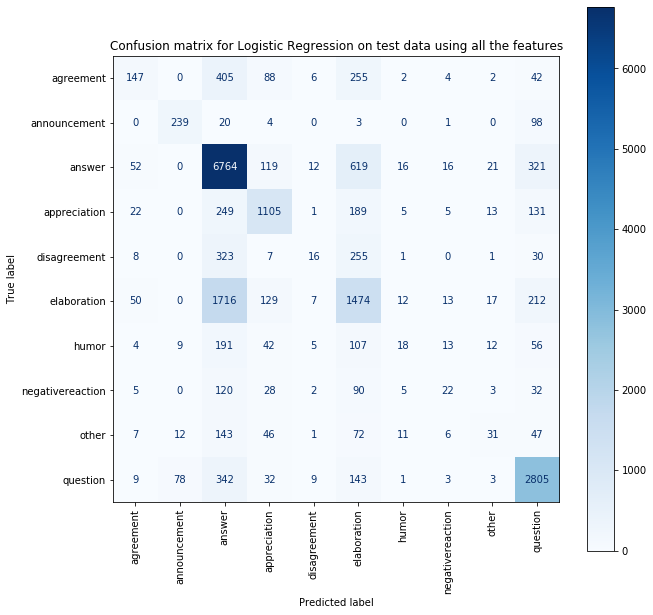

In [0]:
disp = plot_confusion_matrix(lr_model, test_extended, test_labels,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,values_format="d")
plt.xticks(rotation=90)
plt.title("Confusion matrix for Logistic Regression on test data using all the features")